In [1]:
from portfoliolab.clustering import NestedClusteredOptimisation
from datetime import datetime
from pandas_datareader import data as wb
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
import scipy.optimize as sco
from scipy import stats
import scipy
from datetime import datetime
plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_rows', None)
np.set_printoptions(threshold=np.inf)

In [2]:
#quandl.ApiConfig.api_key = 'nTM9G8dBf38JrrTUkLNz'
#stocks = ['AAPL','AMZN','GOOGL','FB']
#data = quandl.get_table('WIKI/PRICES', ticker = stocks,
#                        qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
#                        date = { 'gte': '2016-1-1', 'lte': '2017-12-31' }, paginate=True)
#data.head()


In [3]:
crypto1 = ['ETH-USD','BTC-USD','XLM-USD','LTC-USD']
stocks = ['AAPL','BRK-B','WORK','TSLA','TRIP', 'BABA', 'INTC','BA','AIR.PA','MSFT', 'AMZN' ,'EZJ.L', 'AZN', 'RR.L', 'AZN.L','AML.L','CRWD','VXX']
XRP_USD = ['XRP-USD']
ETC_USD = ['ETC-USD'] 
BCH_USD = ['BCH-USD']
DASH_USD = ['DASH-USD']
data = pd.DataFrame()
dataC1 = pd.DataFrame()
dataC2 = pd.DataFrame()
dataC3 = pd.DataFrame() 
dataC4 = pd.DataFrame()
dataC5 = pd.DataFrame()
dataC6 = pd.DataFrame()
end = datetime.today()
for a in stocks:
    data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2016-6-24')['Adj Close']
for b in crypto1:
    dataC1[b] = wb.DataReader(b, data_source = 'yahoo', start = '2016-6-24')['Adj Close']
    
for c in XRP_USD:
    dataC2[c] = wb.DataReader(c, data_source = 'yahoo', start = '2016-6-24')['Adj Close']

for d in ETC_USD:
    dataC3[d] = wb.DataReader(d, data_source = 'yahoo', start = '2016-6-24')['Adj Close']

for e in ETC_USD:
    dataC4[e] = wb.DataReader(e, data_source = 'yahoo', start = '2016-6-24')['Adj Close']

for f in BCH_USD:
    dataC5[f] = wb.DataReader(f, data_source = 'yahoo', start = '2016-6-24')['Adj Close']
    
for g in DASH_USD:
    dataC6[g] = wb.DataReader(g, data_source = 'yahoo', start = '2016-6-24')['Adj Close']
data2 = pd.merge(data,dataC1, how='inner', left_index=True, right_index=True)
data3 = pd.merge(data2,dataC2, how='inner', left_index=True, right_index=True)
data4 = pd.merge(data3,dataC3, how='inner', left_index=True, right_index=True)
data5 = pd.merge(data4,dataC4, how='inner', left_index=True, right_index=True)
data6 = pd.merge(data5,dataC5, how='inner', left_index=True, right_index=True)
data7 = pd.merge(data6,dataC6, how='inner', left_index=True, right_index=True)
table = data7
table.tail()







,AAPL,BRK-B,WORK,TSLA,TRIP,BABA,INTC,BA,AIR.PA,MSFT,...,VXX,ETH-USD,BTC-USD,XLM-USD,LTC-USD,XRP-USD,ETC-USD_x,ETC-USD_y,BCH-USD,DASH-USD
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-09,136.009995,239.910004,42.930000,849.460022,36.439999,266.489990,58.779999,215.119995,92.470001,243.770004,...,16.400000,1768.035034,46481.105469,0.396737,182.114471,0.471991,9.569907,9.569907,513.532715,136.692505
2021-02-10,135.389999,239.919998,43.060001,804.820007,36.590000,267.790009,58.860001,211.919998,91.690002,242.820007,...,16.670000,1744.243408,44918.183594,0.412419,182.174393,0.503445,10.395907,10.395907,494.967773,139.607666
2021-02-11,135.130005,239.759995,43.570000,811.659973,36.980000,268.929993,60.660000,210.660004,91.220001,244.490005,...,16.280001,1783.797974,47909.332031,0.452912,184.496002,0.524787,11.672607,11.672607,529.737366,164.820190
2021-02-12,135.369995,242.460007,43.689999,816.119995,37.380001,267.850006,61.810001,210.979996,92.209999,244.990005,...,15.740000,1843.532593,47504.851562,0.527843,197.231705,0.608592,12.028255,12.028255,577.604309,169.926041
2021-02-17,130.839996,245.250000,43.459999,798.150024,38.049999,270.829987,61.849998,215.520004,93.900002,244.199997,...,15.650000,1838.849487,52489.921875,0.501081,232.764832,0.548676,15.158767,15.158767,720.169678,265.922302


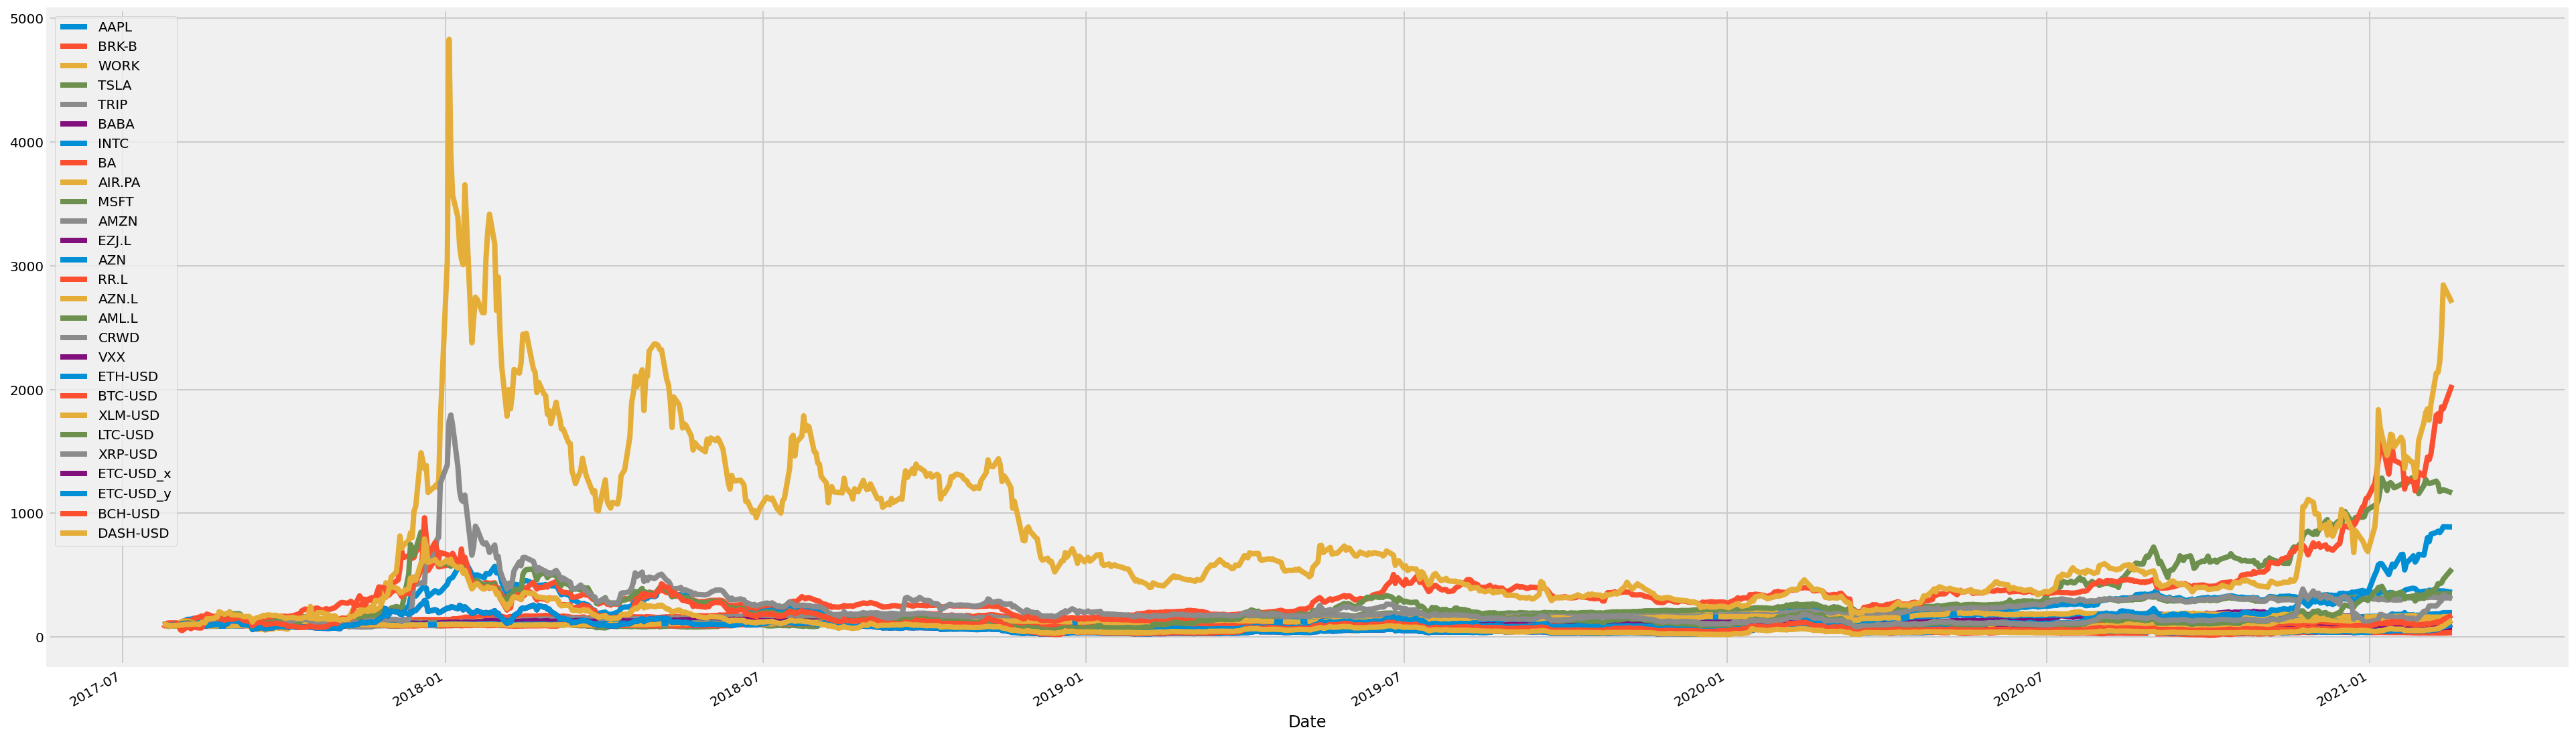

In [4]:
(table / table.iloc[0] * 100).plot(figsize=(30, 10))

Text(0, 0.5, 'price in $')

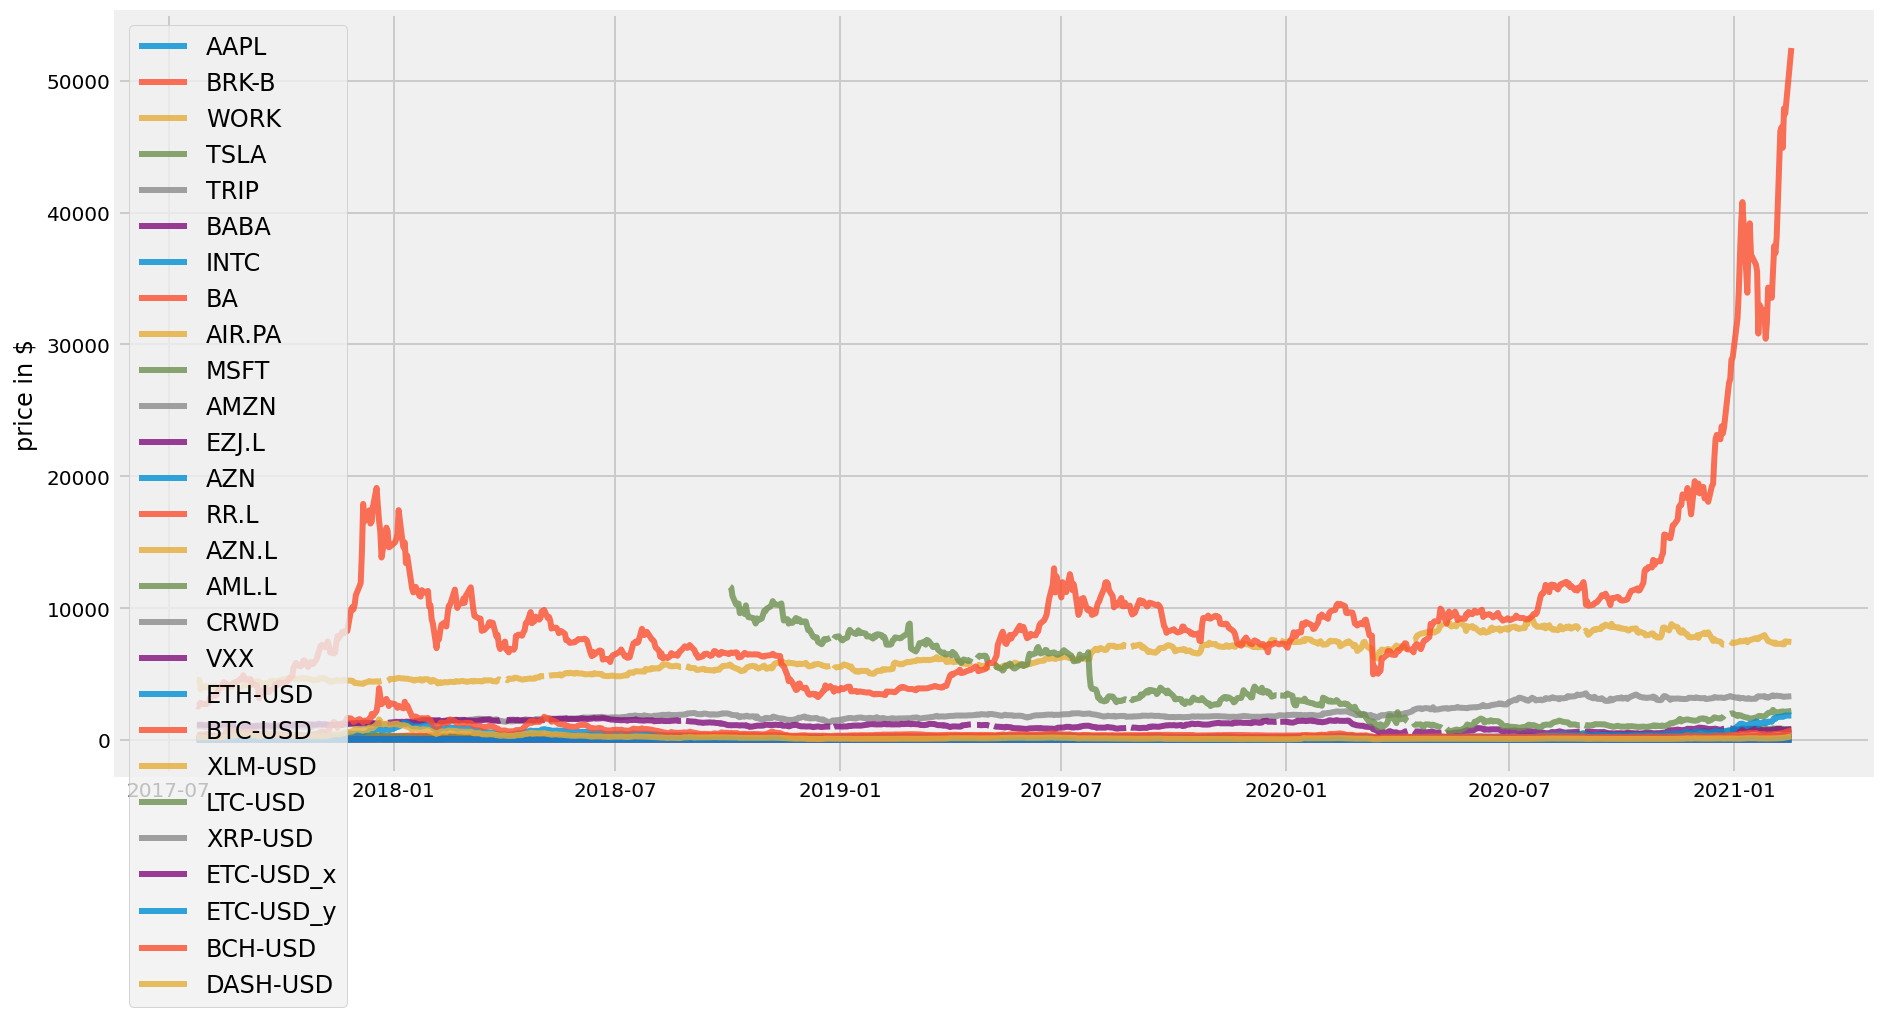

In [5]:
plt.figure(figsize=(14, 7))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

Text(0, 0.5, 'daily returns')

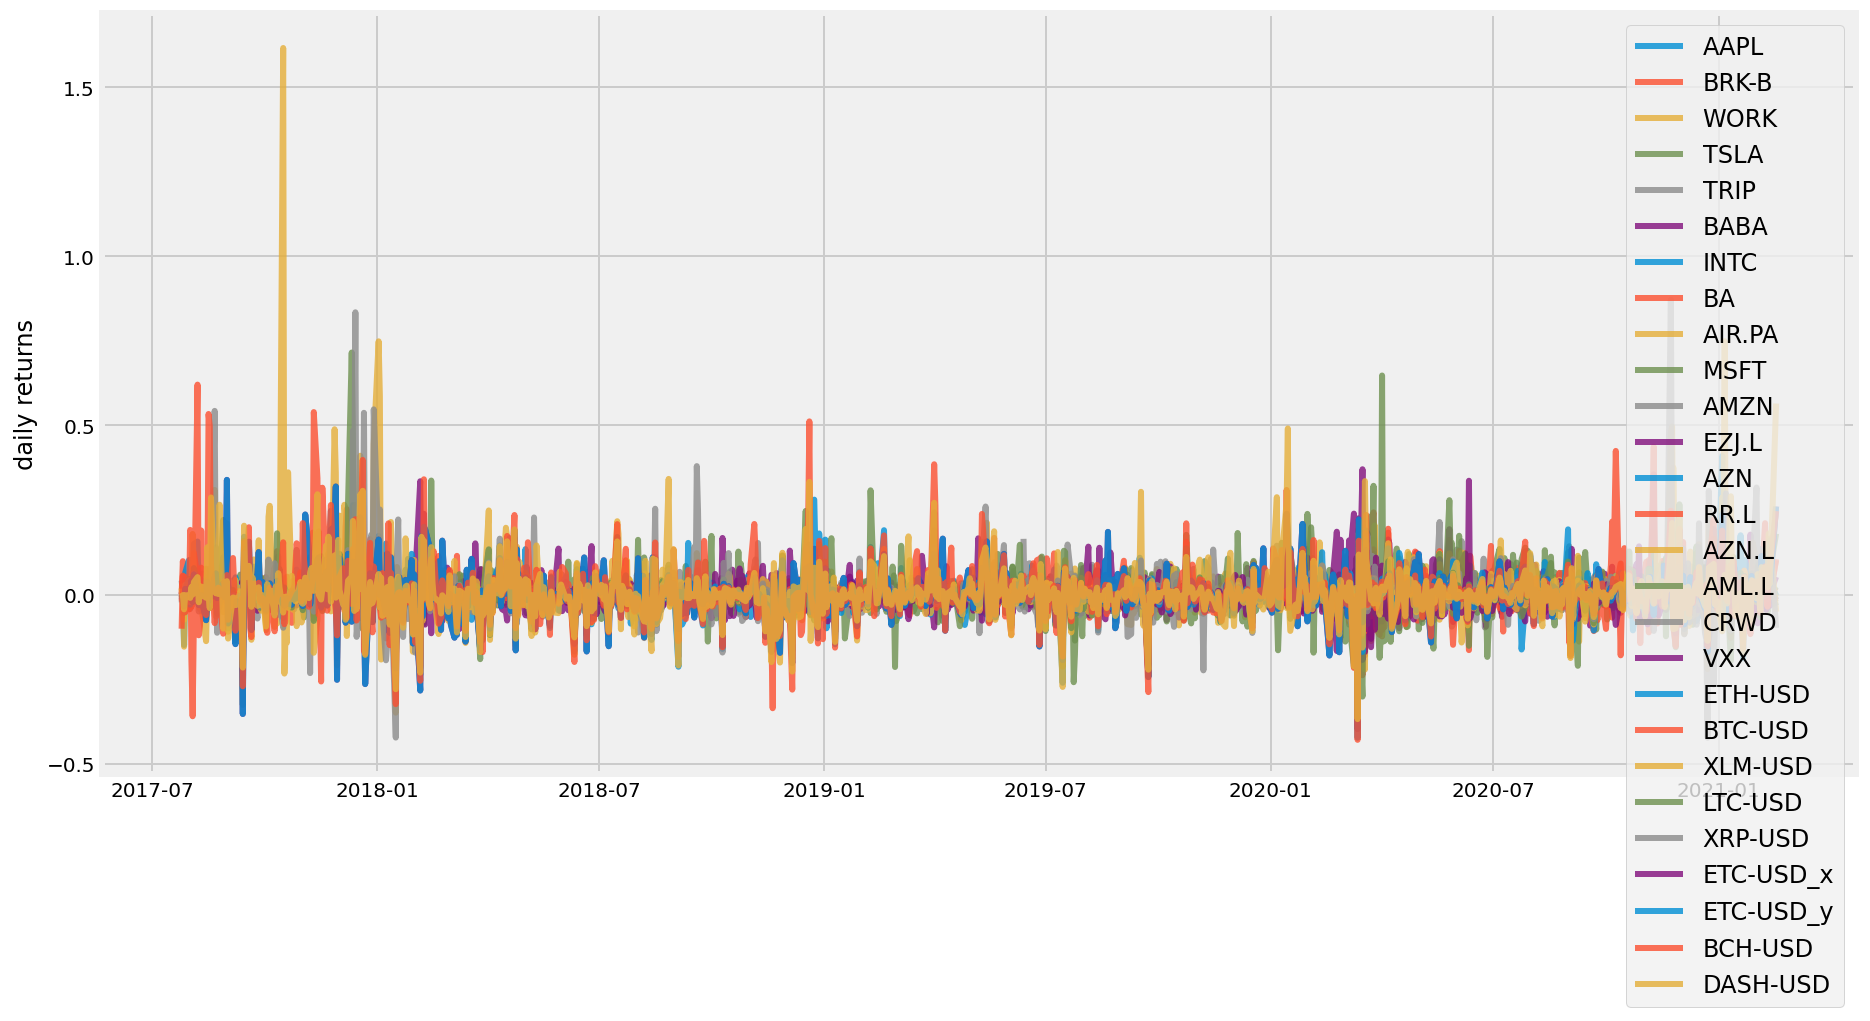

In [6]:
returns = table.pct_change()
plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

In [7]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((27,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(27)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [8]:
returns = table.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
risk_free_rate = 0.0178

In [9]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)


--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.55
Annualised Volatility: 0.26


            AAPL  BRK-B  WORK  TSLA  TRIP  BABA  INTC    BA  AIR.PA  MSFT  \
allocation  3.89   4.65   0.5   7.9  7.15  0.09  5.63  0.09    4.19  7.12   

            ...   VXX  ETH-USD  BTC-USD  XLM-USD  LTC-USD  XRP-USD  ETC-USD_x  \
allocation  ...  6.19     4.61     5.66     5.97     0.33     0.63       1.33   

            ETC-USD_y  BCH-USD  DASH-USD  
allocation        0.6     0.41      0.93  

[1 rows x 27 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.37
Annualised Volatility: 0.22


            AAPL  BRK-B  WORK  TSLA  TRIP  BABA  INTC    BA  AIR.PA  MSFT  \
allocation  6.43   9.35  8.39  2.03   6.5  5.13  6.07  5.14    1.72  2.01   

            ...   VXX  ETH-USD  BTC-USD  XLM-USD  LTC-USD  XRP-U

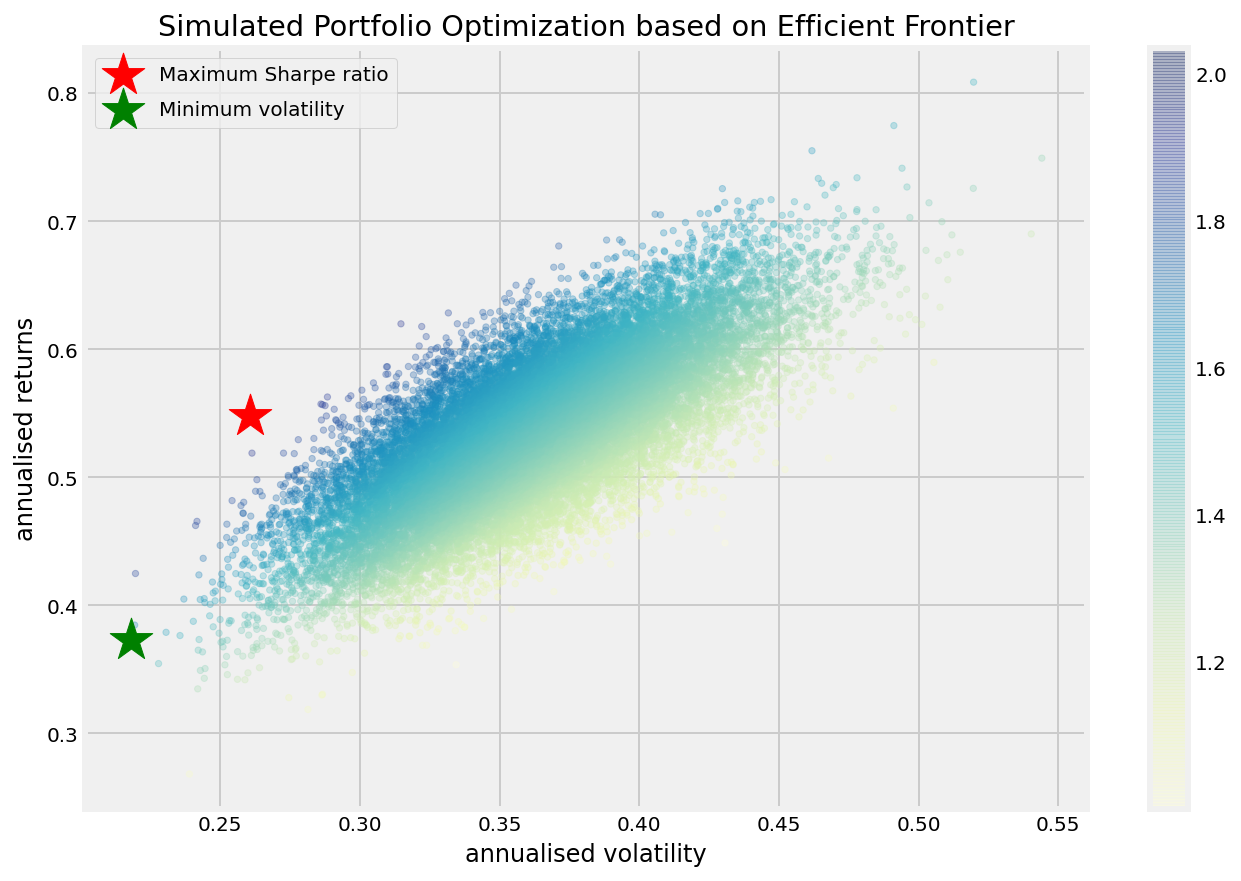

In [10]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [11]:
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [12]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [13]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [14]:

def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [15]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.32, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.48
Annualised Volatility: 0.15


             AAPL  BRK-B  WORK  TSLA  TRIP  BABA  INTC   BA  AIR.PA   MSFT  \
allocation  14.27   7.55   0.0  8.28   0.6   0.0  1.91  0.0    5.47  14.92   

            ...    VXX  ETH-USD  BTC-USD  XLM-USD  LTC-USD  XRP-USD  \
allocation  ...  19.56      0.0     6.68     2.41      0.0     0.01   

            ETC-USD_x  ETC-USD_y  BCH-USD  DASH-USD  
allocation        0.0        0.0      0.0       0.0  

[1 rows x 27 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.2
Annualised Volatility: 0.1


            AAPL  BRK-B  WORK  TSLA  TRIP  BABA  INTC   BA  AIR.PA  MSFT  ...  \
allocation  3.95  35.38  2.41  1.07  0.06  5.53  3.22  0.0    2.26  1.87  ...   

              VXX  ETH-USD  BTC-USD  XLM-USD  LTC-USD 

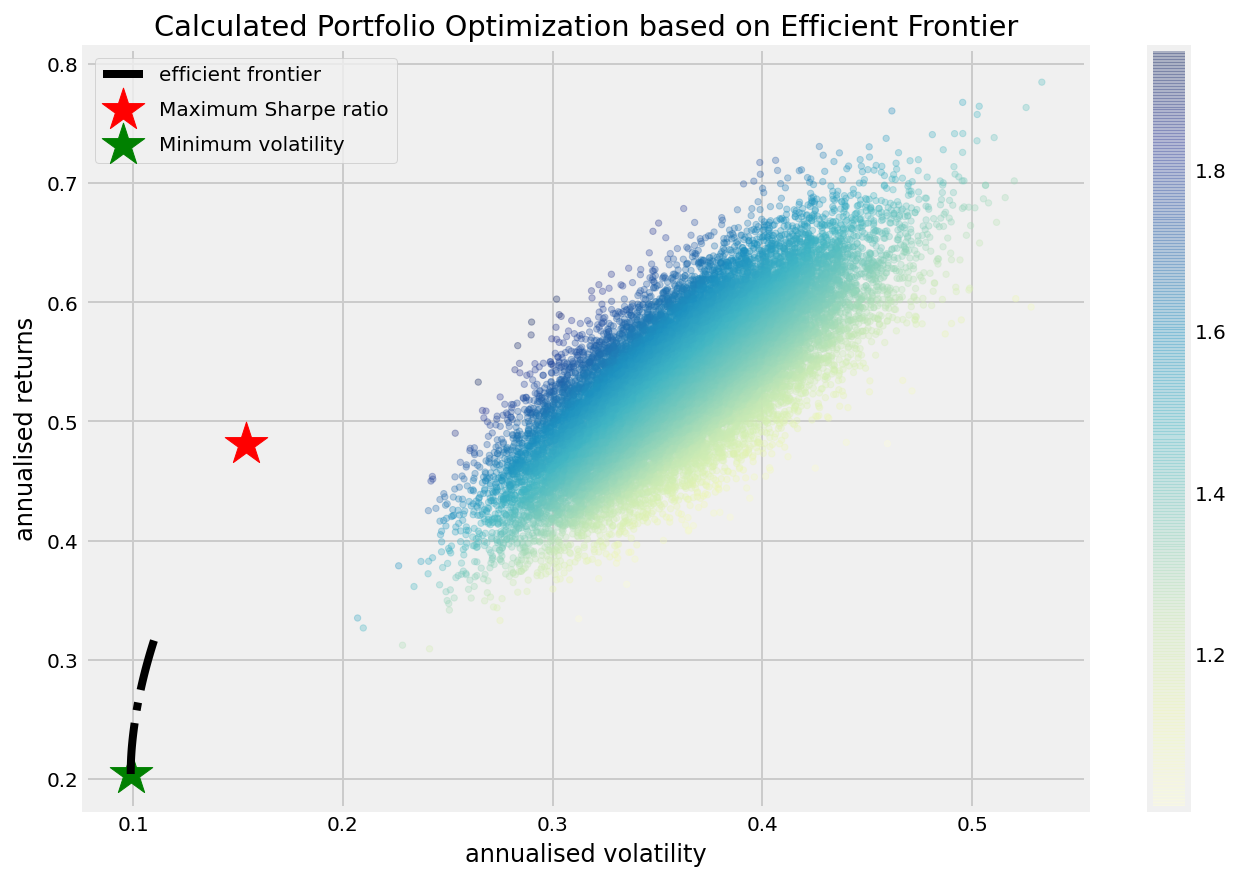

In [16]:
display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [17]:
def display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    an_vol = np.std(returns) * np.sqrt(252)
    an_rt = mean_returns * 252
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    print ("-"*80)
    print ("Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(table.columns):
        print (txt,":","annuaised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
    print ("-"*80)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(table.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.66, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.48
Annualised Volatility: 0.15


             AAPL  BRK-B  WORK  TSLA  TRIP  BABA  INTC   BA  AIR.PA   MSFT  \
allocation  14.27   7.55   0.0  8.28   0.6   0.0  1.91  0.0    5.47  14.92   

            ...    VXX  ETH-USD  BTC-USD  XLM-USD  LTC-USD  XRP-USD  \
allocation  ...  19.56      0.0     6.68     2.41      0.0     0.01   

            ETC-USD_x  ETC-USD_y  BCH-USD  DASH-USD  
allocation        0.0        0.0      0.0       0.0  

[1 rows x 27 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.2
Annualised Volatility: 0.1


            AAPL  BRK-B  WORK  TSLA  TRIP  BABA  INTC   BA  AIR.PA  MSFT  ...  \
allocation  3.95  35.38  2.41  1.07  0.06  5.53  3.22  0.0    2.26  1.87  ...   

              VXX  ETH-USD  BTC-USD  XLM-USD  LTC-USD 

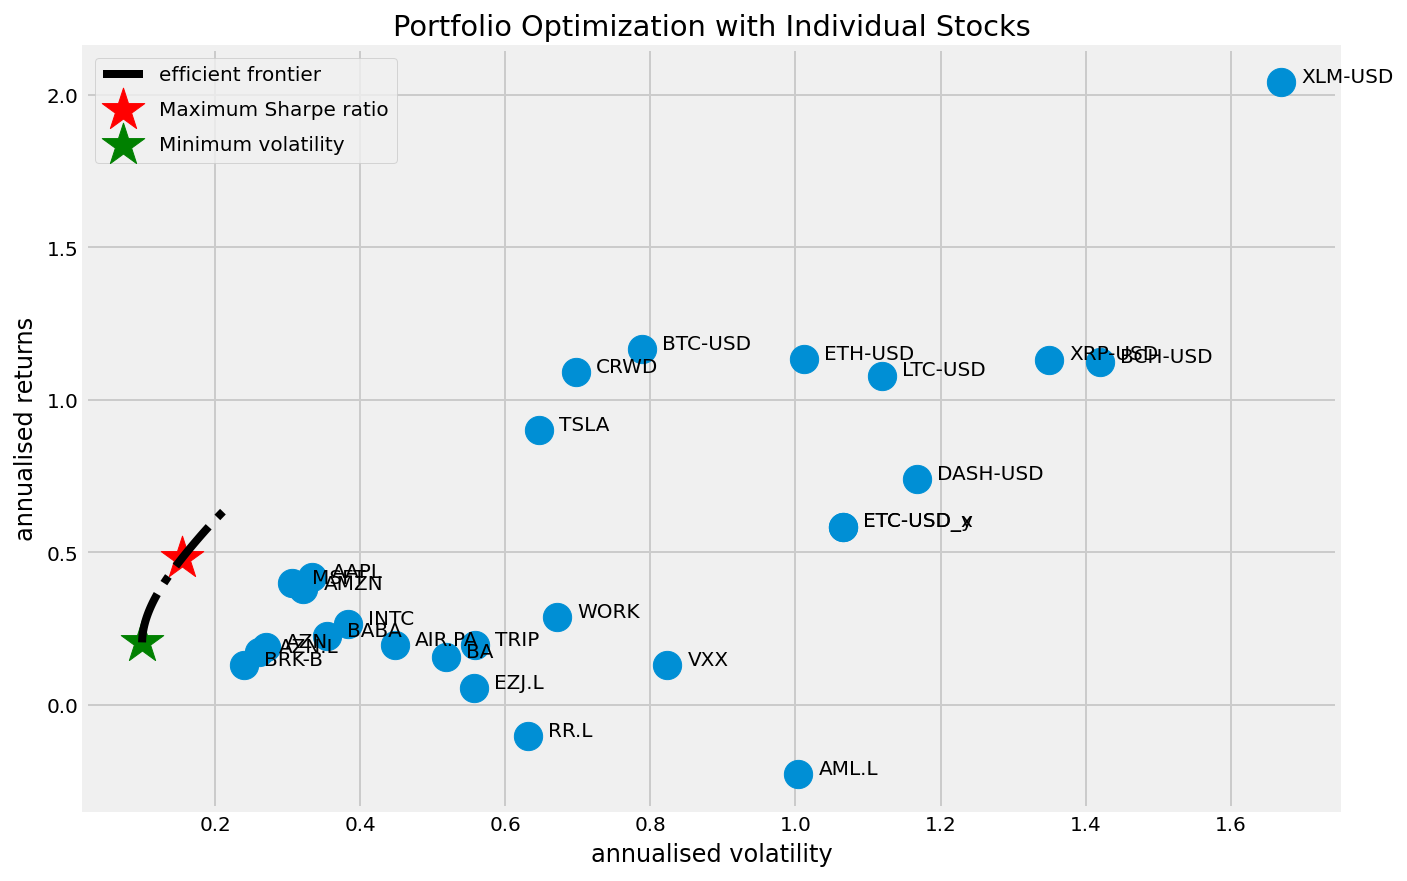

In [18]:
display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate)

In [19]:
print(cov_matrix)

               AAPL     BRK-B      WORK      TSLA      TRIP      BABA  \
AAPL       0.000441  0.000184  0.000248  0.000352  0.000223  0.000243   
BRK-B      0.000184  0.000227  0.000087  0.000180  0.000237  0.000126   
WORK       0.000248  0.000087  0.001790  0.000464  0.000087  0.000235   
TSLA       0.000352  0.000180  0.000464  0.001662  0.000313  0.000279   
TRIP       0.000223  0.000237  0.000087  0.000313  0.001234  0.000204   
BABA       0.000243  0.000126  0.000235  0.000279  0.000204  0.000498   
INTC       0.000287  0.000205  0.000252  0.000308  0.000246  0.000232   
BA         0.000294  0.000303  0.000268  0.000387  0.000535  0.000230   
AIR.PA     0.000132  0.000193  0.000131  0.000241  0.000405  0.000145   
MSFT       0.000304  0.000185  0.000292  0.000337  0.000217  0.000241   
AMZN       0.000273  0.000122  0.000287  0.000313  0.000178  0.000250   
EZJ.L      0.000103  0.000199  0.000007  0.000237  0.000435  0.000153   
AZN        0.000126  0.000088  0.000175  0.000149  

In [20]:
cov_matrix.count()

AAPL         27
BRK-B        27
WORK         27
TSLA         27
TRIP         27
BABA         27
INTC         27
BA           27
AIR.PA       27
MSFT         27
AMZN         27
EZJ.L        27
AZN          27
RR.L         27
AZN.L        27
AML.L        27
CRWD         27
VXX          27
ETH-USD      27
BTC-USD      27
XLM-USD      27
LTC-USD      27
XRP-USD      27
ETC-USD_x    27
ETC-USD_y    27
BCH-USD      27
DASH-USD     27
dtype: int64

In [21]:
nObs = 15117
nSims = 1000
shrink = True


In [22]:
def monteCarlo(mean_returns,cov_matrix,nObs,nSims,bWidth,minVarPortf,shrink):
 w1=pd.DataFrame(columns=xrange(cov0.shape[0]),
 index=xrange(nSims),dtype=float)
 w1_d=w1.copy(deep=True)
 for i in range(nSims):
 mu1,cov1=simCovMu(mean_returns,cov_matrix,nObs,shrink)
 if minVarPortf:mu1=None
 if bWidth>0:cov1=deNoiseCov(cov1,nObs*1./cov1.shape[1],bWidth)
 w1.loc[i]=optPort(cov1,mu1).flatten()
 w1_d.loc[i]=optPort_nco(cov1,mu1,int(cov1.shape[0]/2)).flatten()
 return

IndentationError: expected an indented block (<ipython-input-22-ddc502a01e9a>, line 6)

In [ ]:
data.count()

In [ ]:
print(1168*9+1150*3+1155)

In [ ]:
scipy.stats.gaussian_kde(data, bw_method=None, weights=None)